Wine Quality Prediction

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("winequality-red.csv")

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

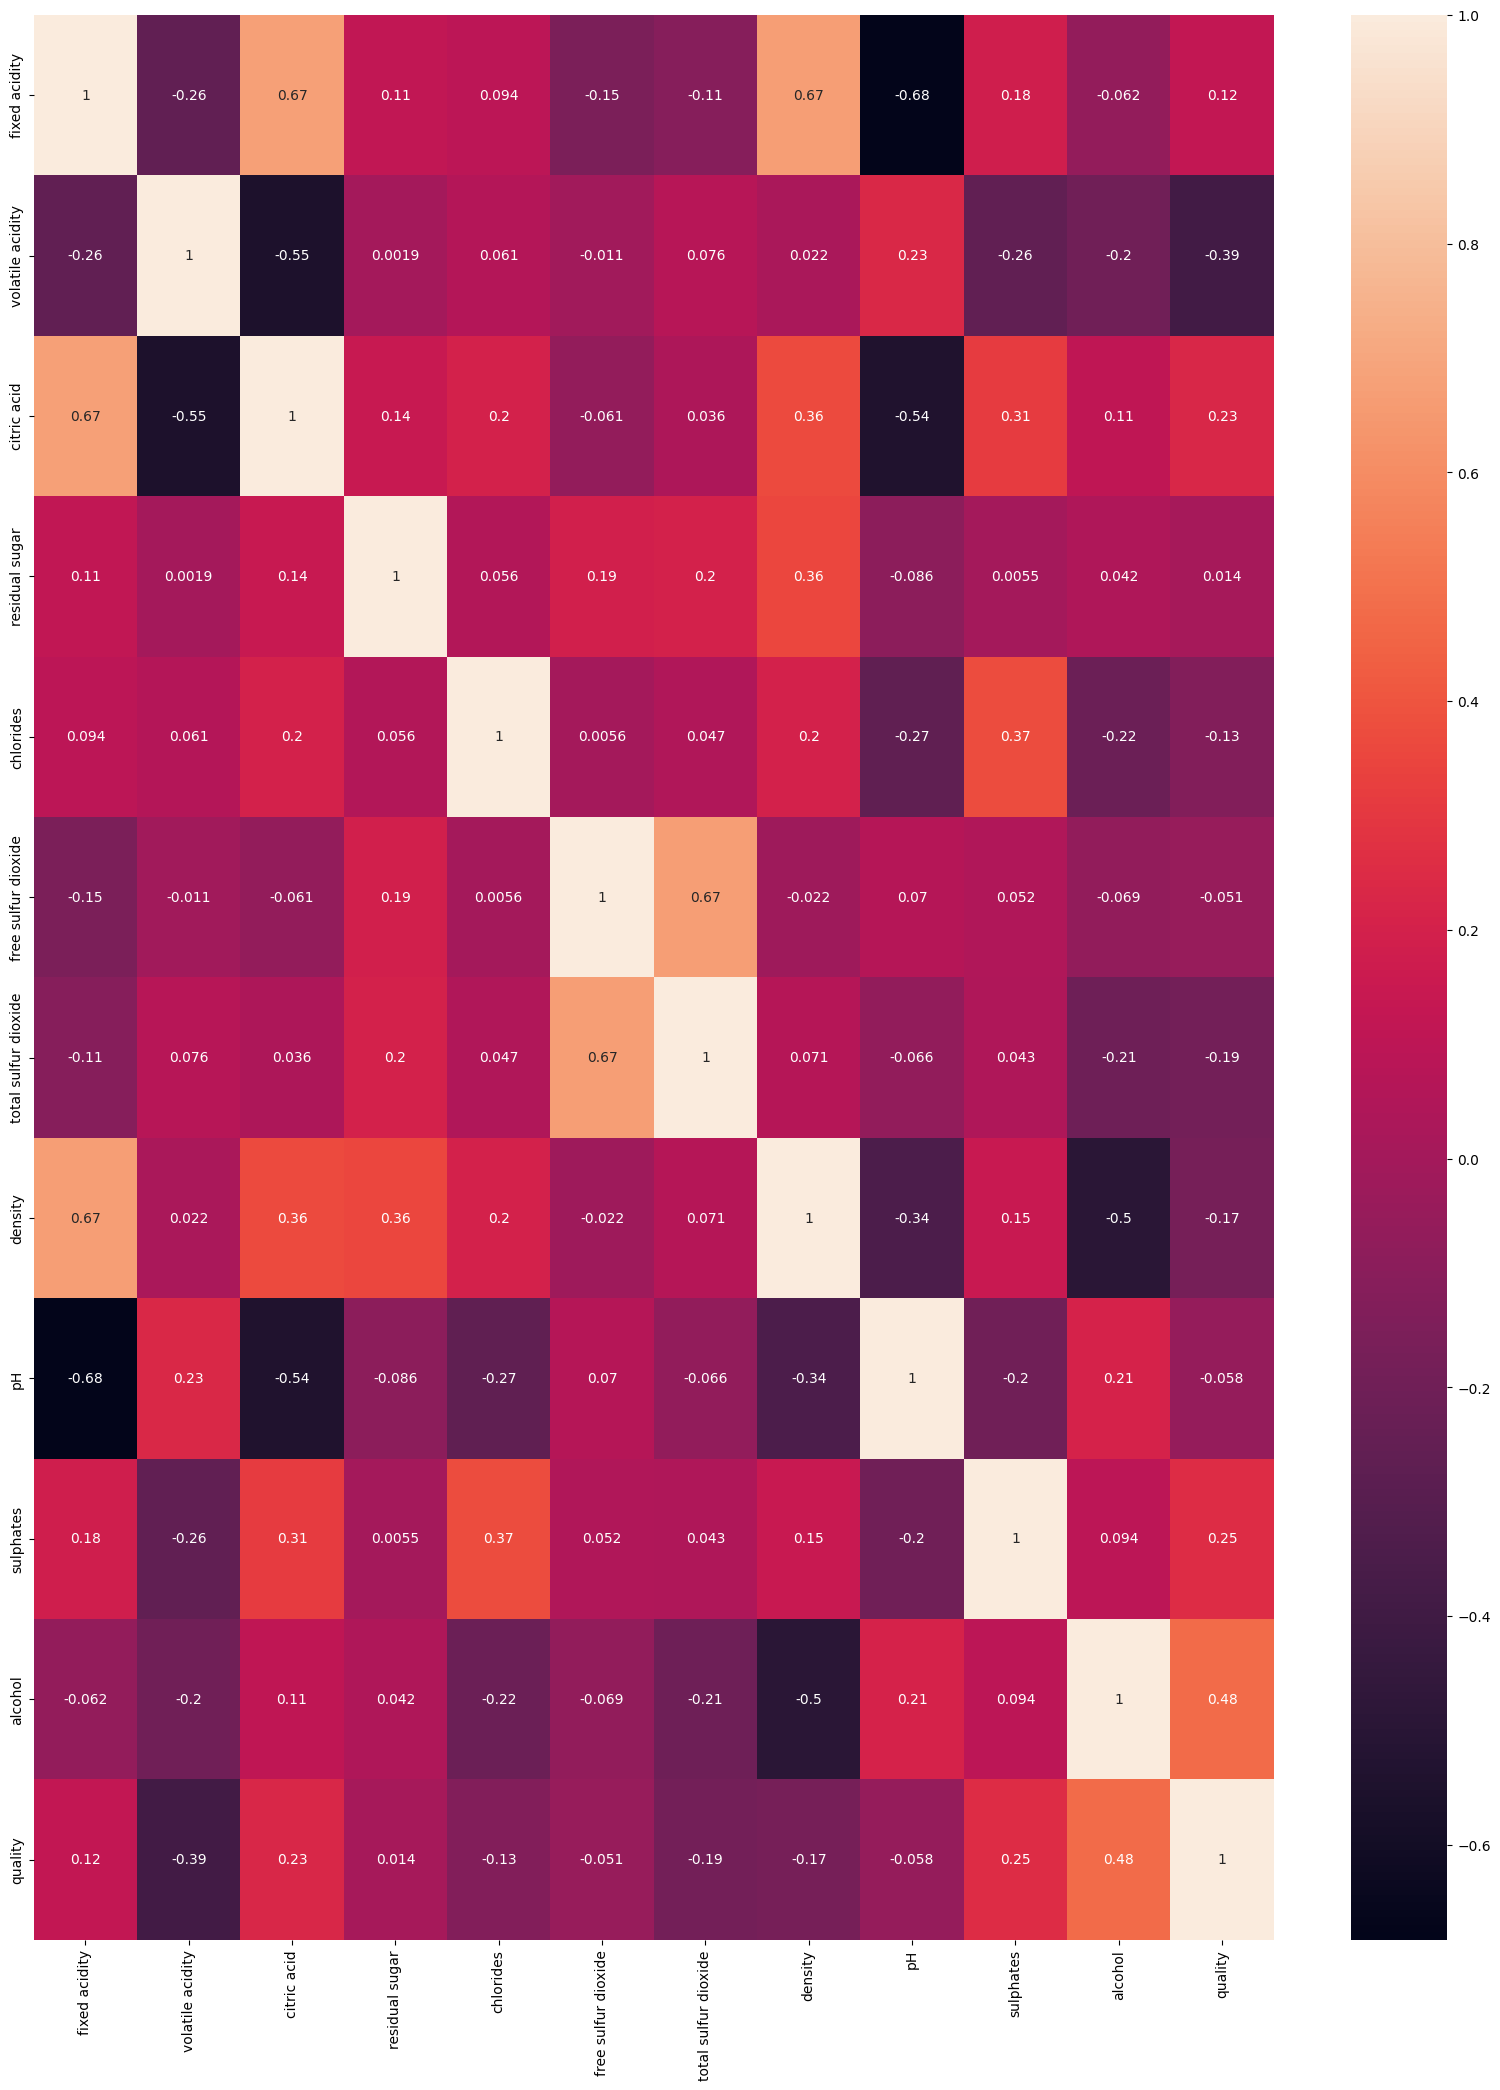

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_mat = data.corr()
plt.figure(figsize=(20,25))
sns.heatmap(cor_mat, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train[:]=scaler.fit_transform(train[:])

In [ ]:
Y_train=train.pop('quality')
X_train=train

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm,n_features_to_select=9)
rfe = rfe.fit(X_train, Y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', False, 3),
 ('volatile acidity', True, 1),
 ('citric acid', True, 1),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', False, 2),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[col]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,pH,12.16
0,volatile acidity,7.54
7,sulphates,6.49
8,alcohol,5.82
4,free sulfur dioxide,5.75
5,total sulfur dioxide,5.03
3,chlorides,5.01
1,citric acid,3.88
2,residual sugar,2.63


In [ ]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(Y_train, X_train_lm1).fit()

In [ ]:
lr1.params

const                   0.561648
volatile acidity       -0.342187
citric acid            -0.037892
residual sugar          0.031382
chlorides              -0.283640
free sulfur dioxide     0.062550
total sulfur dioxide   -0.218628
pH                     -0.131625
sulphates               0.341886
alcohol                 0.355635
dtype: float64

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     83.30
Date:                Tue, 13 Feb 2024   Prob (F-statistic):          2.13e-121
Time:                        22:38:02   Log-Likelihood:                 807.12
No. Observations:                1279   AIC:                            -1594.
Df Residuals:                    1269   BIC:                            -1543.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5616 

In [ ]:
X_train_lm8 = sm.add_constant(X_train)
lr8 = sm.OLS(Y_train, X_train_lm8).fit()

In [ ]:
lr8.params

const                   0.568949
fixed acidity           0.010772
volatile acidity       -0.336779
citric acid            -0.032122
residual sugar          0.045138
chlorides              -0.285655
free sulfur dioxide     0.061863
total sulfur dioxide   -0.220674
density                -0.029758
pH                     -0.125042
sulphates               0.347785
alcohol                 0.341882
dtype: float64

In [ ]:
y_train_pred = lr8.predict(X_train_lm8)

C:\Users\khush\AppData\Local\Temp\ipykernel_42072\2938033740.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((res), bins = 20)


Text(0.5, 0, 'Errors')

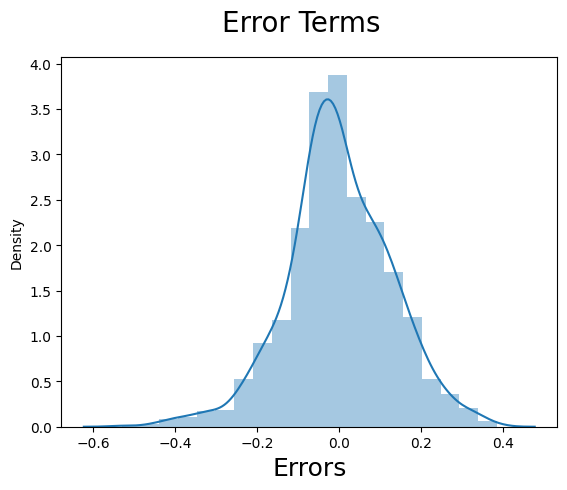

In [ ]:
res = Y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


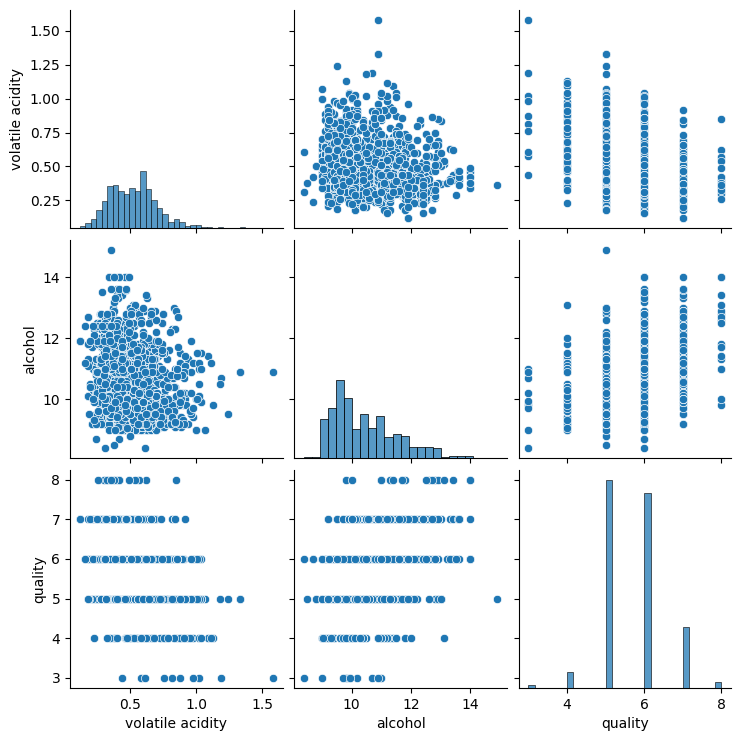

In [ ]:
wine_num=data[[ 'volatile acidity', 'alcohol', 'quality']]

sns.pairplot(wine_num)
plt.show()